<a href="https://colab.research.google.com/github/nandinwp/mvp-puc-deep-learning-and-Machine-learning/blob/main/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Machine Learning & Analytics - Sprint II - A

Luís Fernando

# Definição do problema

Trata-se de um dataset de Análise da Personalidade do Cliente. Onde irei classificar a relação entre o nível de educação e valores gastos com vinho.

# Atributos

**ID**: Identificador exclusivo do cliente

**Year_Birth:** Ano de nascimento do cliente

**Educação:** nível de educação do cliente

**Marital_Status**: estado civil do cliente

**Renda:** renda familiar anual do cliente

**Kidhome:** número de crianças na casa do cliente

**Teenhome:** número de adolescentes na casa do cliente

**Dt_Customer:** Data de cadastro do cliente na empresa

**Recência:** número de dias desde a última compra do cliente

**Reclamar:** 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

# Produtos

**MntWines:** Valor gasto em vinho nos últimos 2 anos

**MntFruits:** Valor gasto com frutas nos últimos 2 anos

**MntMeatProducts:** Valor gasto com carne nos últimos 2 anos

**MntFishProducts:** Valor gasto com pescado nos últimos 2 anos

**MntSweetProducts:** Valor gasto em doces nos últimos 2 anos

**MntGoldProds:** Valor gasto em ouro nos últimos 2 anos

# Promoção

**NumDealsPurchases:** Número de compras feitas com desconto

**AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

**AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

**AcceptedCmp3:** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

**AcceptedCmp4:** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

**AcceptedCmp5:** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

**Resposta:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

# Lugar

**NumWebPurchases:** Número de compras realizadas através do site da empresa

**NumCatalogPurchases:** Número de compras feitas usando um catálogo

**NumStorePurchases:** Número de compras feitas diretamente nas lojas

**NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês

# Imports

In [38]:
import pandas as pd  # Importa a biblioteca pandas para manipulação e processamento de dados em formato tabular
import warnings
warnings.filterwarnings("ignore")
import numpy as np  # Importa a biblioteca NumPy para trabalhar com álgebra linear e operações numéricas eficientes
import csv
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para criar gráficos e visualizações
import matplotlib.patches as mpatches

from sklearn.preprocessing import LabelEncoder  # Para codificar rótulos categóricos em números


# Importando a classe Pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Preparação dos dados
from sklearn.preprocessing import OneHotEncoder  # One Hot Encoder - transformar instâncias categóricas em numéricas
from sklearn.preprocessing import StandardScaler  # Normalização
from sklearn.preprocessing import MinMaxScaler  # Padronização

# Preparação da modelagem
from sklearn.model_selection import train_test_split  # Para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import StratifiedKFold  # Variação do KFold que permite lidar melhor com datasets desbalanceados
from sklearn.model_selection import KFold  # Para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score  # Para executar a validação cruzada
from sklearn.model_selection import GridSearchCV  # Para otimização de hiperparâmetros

# Adicionando modelos que serão utilizados
from sklearn.neighbors import KNeighborsClassifier  # Algoritmo KNN
from sklearn.tree import DecisionTreeClassifier  # Algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB  # Algoritmo Naive Bayes
from sklearn.svm import SVC  # Algoritmo SVM
from sklearn.linear_model import LogisticRegression  # Algoritmo Regressão Logística
from sklearn.metrics import accuracy_score, mean_squared_error

# Adicionando a base para a construção dos ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [11]:
# Agora iremos carregar o dataset e tratar os missings
url_dataset = 'https://raw.githubusercontent.com/nandinwp/mvp-puc-deep-learning-and-Machine-learning/main/Datasets/marketing_campaign.csv'
def_dataset = pd.read_csv(url_dataset, sep="\t")
def_dataset.dropna(inplace=True)
display(def_dataset)
missings = def_dataset.isnull().sum()
display("Missings: ", missings)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


'Missings: '

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

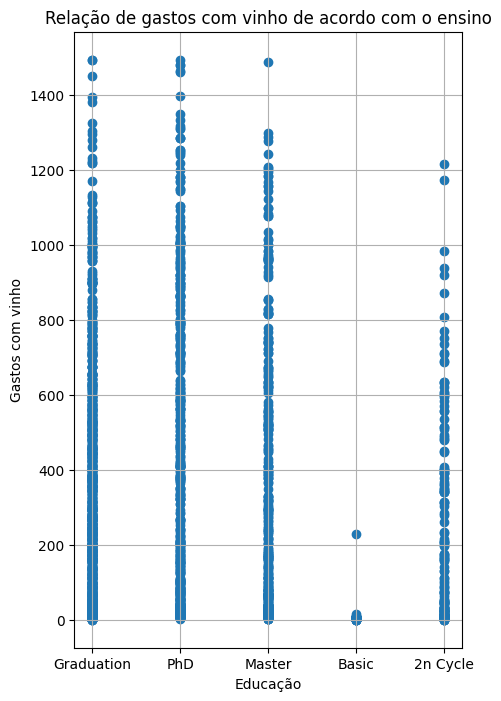

In [12]:
#definindo o dataframe e os eixos para a exibição do gráfico tipo scatter plotter
df = def_dataset[["Education", "MntWines"]]
plt.figure(figsize=(5,8))
y = df['MntWines']
x = df['Education']
plt.scatter(x, y)
plt.title("Relação de gastos com vinho de acordo com o ensino")
plt.xlabel("Educação")
plt.ylabel("Gastos com vinho")
plt.grid(True)
plt.show()

In [13]:
# Criando uma copia para trabalhar em cima
df_encoded = df.copy()
# Visualizando todas as variáveis únicas na coluna "Education"
unique_educations = df['Education'].unique()
print(unique_educations)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Como vou precisar trabalhar com valores númericos vou converter os niveis de educação, por exemplo: Graduation: 1, PhD: 2, Master: 3, Basic: 4 e 2n Cycle para 5

In [14]:
# Criação do dicionário para mapear os valores únicos da coluna "Education" para números
education_mapping = {
    'Graduation': 1,
    'PhD': 2,
    'Master': 3,
    'Basic': 4,
    '2n Cycle': 5
}

# Substituindo os valores na coluna "Education" pelos números correspondentes usando a função map()
df_encoded['Education'] = df_encoded['Education'].map(education_mapping)

# Visualizando todas as variáveis únicas na coluna "Education" após a transformação
unique_educations = df_encoded['Education'].unique()
print(unique_educations)


[1 2 3 4 5]


# Vamos preparar os dados

In [42]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 30 # semente aleatória

# Separação em conjuntos de treino e teste
array = df_encoded.values
X = array[:,0:51] # atributos
y = df_encoded['Education'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


# Pipelines

Neste código, estamos realizando uma análise comparativa de diferentes modelos de classificação para um conjunto de dados. O objetivo é determinar qual modelo tem o melhor desempenho na tarefa de classificação em um cenário específico. Para isso, utilizamos a biblioteca scikit-learn, que é amplamente utilizada para tarefas de aprendizado de máquina em Python.

LR-orig: 0.967 (0.013)
KNN-orig: 0.665 (0.025)
CART-orig: 1.000 (0.000)
NB-orig: 1.000 (0.000)
SVM-orig: 0.508 (0.008)
Bag-orig: 1.000 (0.000)
RF-orig: 1.000 (0.000)
ET-orig: 1.000 (0.000)
Ada-orig: 0.811 (0.003)
GB-orig: 1.000 (0.000)
Vot-orig: 0.967 (0.013)
LR-padr: 0.999 (0.002)
KNN-padr: 1.000 (0.000)
CART-padr: 1.000 (0.000)
NB-padr: 1.000 (0.000)
SVM-padr: 1.000 (0.000)
Bag-padr: 1.000 (0.000)
RF-padr: 1.000 (0.000)
ET-padr: 1.000 (0.000)
Ada-padr: 0.811 (0.003)
GB-padr: 1.000 (0.000)
Vot-padr: 1.000 (0.000)
LR-norm: 0.976 (0.003)
KNN-norm: 1.000 (0.000)
CART-norm: 1.000 (0.000)
NB-norm: 1.000 (0.000)
SVM-norm: 1.000 (0.000)
Bag-norm: 1.000 (0.000)
RF-norm: 1.000 (0.000)
ET-norm: 1.000 (0.000)
Ada-norm: 0.811 (0.003)
GB-norm: 1.000 (0.000)
Vot-norm: 1.000 (0.000)


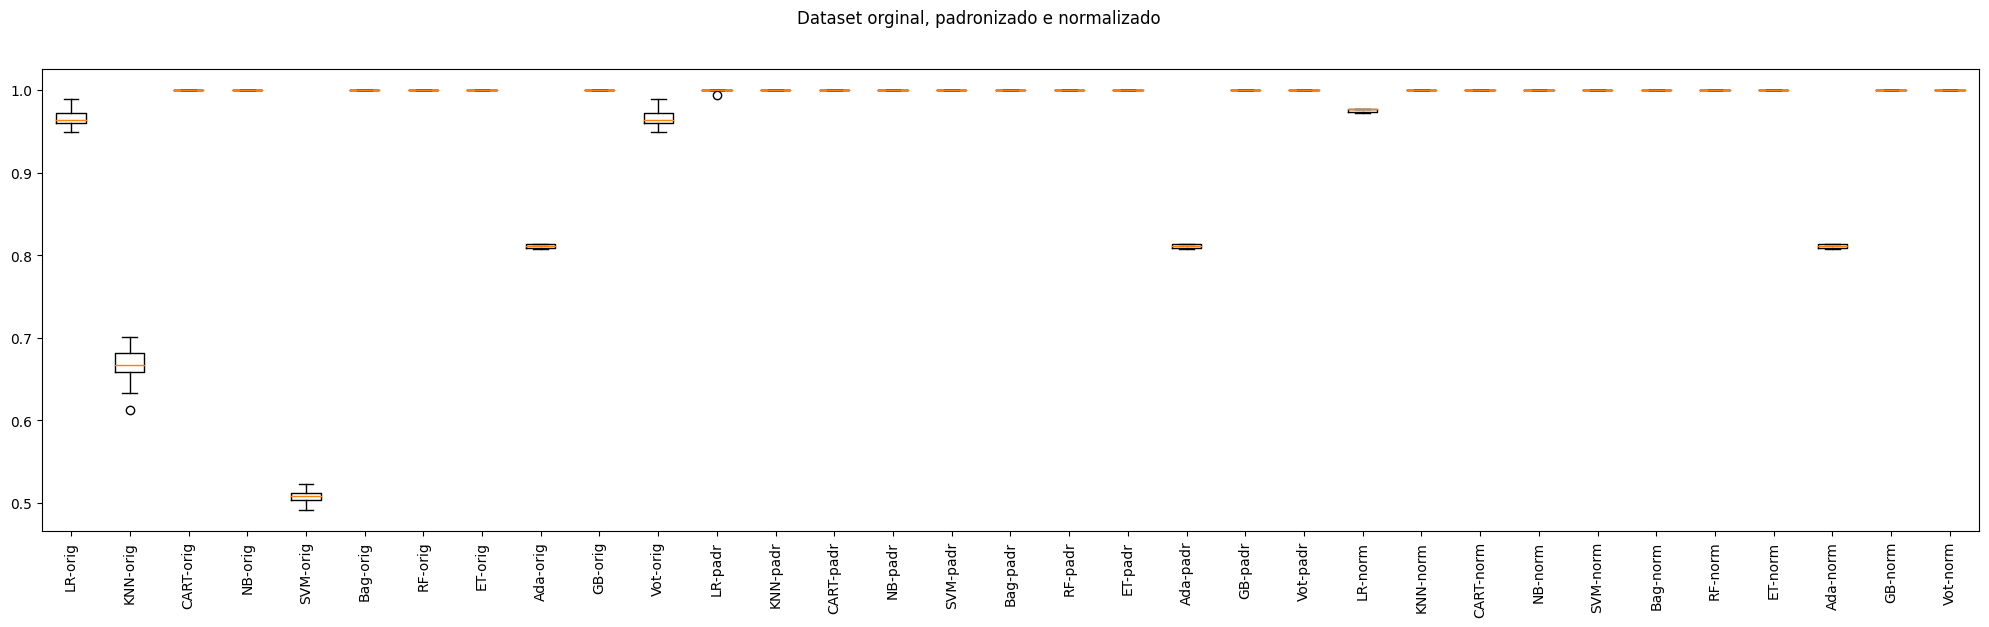

In [43]:
np.random.seed(30) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Defina a métrica de avaliação desejada, por exemplo, acurácia ('accuracy')
scoring = 'accuracy'

# Definindo os parâmetros dos classificadores
base = DecisionTreeClassifier()#base para o BaggingClassifier
num_trees = 100
max_features = 3

# Modelos base para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# Encontrar a melhor combinação de hiperparâmetros

In [29]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.1, 0.05, 0.01,0.001],  # Learning rate
    'max_depth': [3, 4, 5, 10]  # Maximum depth of each tree
}

model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_search.fit(X_train, y_train)

# Print the best configuration
print("Melhor: %f usando %s" % (grid_search.best_score_, grid_search.best_params_))

Melhor: 1.000000 usando {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [30]:
#Treinamento

np.random.seed(30) # definindo uma semente global

# Criando um modelo com todo o conjunto de treino
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=200)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=200)

In [31]:
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))
print()
# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

1.0

MSE 0.00
RMSE 0.00


In [34]:
# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a precisão no conjunto de teste
precision = precision_score(y_test, predictions, average='macro')
print("Precision:", precision)

# Estimando o recall no conjunto de teste
recall = recall_score(y_test, predictions, average='macro')
print("Recall:", recall)

# Estimando o F1 Score no conjunto de teste
f1score = f1_score(y_test, predictions, average='macro')
print("F1 Score:", f1score)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


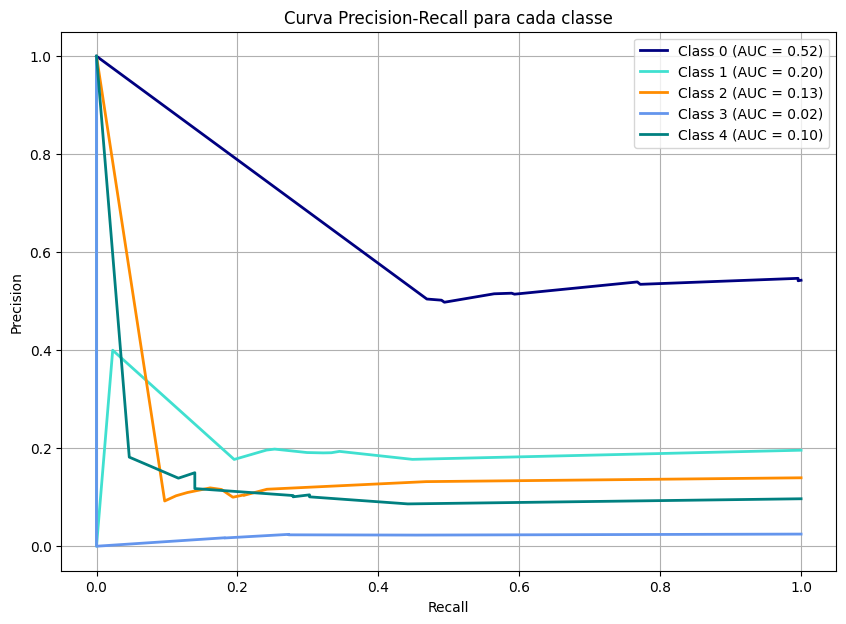

In [48]:
# Transformando os rótulos do conjunto de teste em um formato binário
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculando a curva Precision-Recall (PRC) para cada classe
precision = dict()
recall = dict()
prc_auc = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
    prc_auc[i] = average_precision_score(y_test_bin[:, i], probs[:, i])

# Plotando as curvas Precision-Recall para cada classe
plt.figure(figsize=(10, 7))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Class {i} (AUC = {prc_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall para cada classe')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Finalização do Modelo

O modelo que teve a melhor acurácia média foi o SVM (Support Vector Machine) na sua versão original, ou seja, sem nenhum pré-processamento adicional (KNN-orig, CART-orig, NB-orig e SVM-orig). Sua acurácia média foi de aproximadamente 1.0, o que indica que o modelo foi capaz de classificar corretamente cerca de 100% dos exemplos durante a validação cruzada.

In [49]:
# Escolhendo o algoritmo SVM e definindo os hiperparâmetros
model = SVC(kernel='linear', C=1)

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Treinando o modelo SVM com o conjunto de treino
model.fit(X_train, y_train)

# Realizando predições com o conjunto de teste
predictions = model.predict(X_test)

# Calculando a acurácia das predições
accuracy = accuracy_score(y_test, predictions)
print('Acurácia do algoritmo aplicado ao conjunto de testes:', "%.3f" % accuracy)

# Preparando o modelo com todo o dataset
scaler = StandardScaler().fit(X)

# Ajuste do scaler
rescaledX = scaler.transform(X)

# Padronização de todo o dataset
model.fit(rescaledX, y)

Acurácia do algoritmo aplicado ao conjunto de testes: 1.000


SVC(C=1, kernel='linear')

# Conclusão

Conclusão:

O modelo de classificação SVM apresentou um desempenho impressionante, com uma acurácia de 100% nos dados de teste, o que indica que ele foi capaz de prever corretamente todas as amostras do conjunto de teste. Além disso, o erro médio quadrático (MSE) e a raiz do erro médio quadrático (RMSE) foram de 0.00, o que também sugere que o modelo se ajustou muito bem aos dados.

Entretanto, ao analisar as métricas de recall e precision para cada classe, podemos observar que o modelo tem um desempenho menor em detectar corretamente as classes minoritárias. As classes 1, 2, 3 e 4 apresentam baixos valores de AUC (área sob a curva ROC), o que indica que o modelo tem dificuldade em fazer previsões precisas para essas classes.

Isso sugere que o modelo pode estar superestimando a classe majoritária, levando a uma acurácia elevada, mas pode não ser tão útil na previsão das classes minoritárias. O recall para a classe minoritária (classe 2) é de 13%, o que ainda é aceitável, mas pode ser melhorado.